In [30]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
X,Y=make_classification(n_classes=2,n_samples=400,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=3)

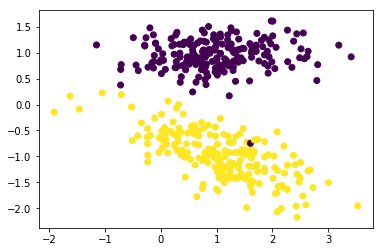

In [32]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [33]:
Y[Y==0]=-1

In [34]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
        
    def HingeLoss(self,W,b,X,Y):
        loss=0.0
        
        loss+=0.5*np.dot(W,W.T)
        m=X.shape[0]
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        
        c=self.C
        n=learning_rate
        
        w=np.zeros((1,no_of_features))
        
        bias=0
        
        print(self.HingeLoss(w,bias,X,Y))
        
        loss=[]
        
        for i in range(maxItr):
            
            l=self.HingeLoss(w,bias,X,Y)
            loss.append(l)
            #batch gradient
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                
                gradw=0
                gradb=0
                
                for j in range(batch_start,batch_start+batch_size):
                    
                    if j<no_of_samples:
                        
                        k=ids[j]
                        ti=Y[k]*(np.dot(w,X[k].T)+bias)
                        
                        if(ti<=1):
                            gradw+=c*Y[k]*X[k]
                            gradb+=c*Y[k]
                            
                w=w-n*w + n*gradw
                bias=bias + n*gradb
        self.W=w
        self.b=bias
        return w,bias,loss
    
    def predict(self,w,b,Xt):
        Ypred=[]
        for i in range(Xt.shape[0]):
            pre=np.dot(w,Xt[i].T)+b
            if(pre>0):
                Ypred.append(1)
            else:
                Ypred.append(-1)
        return np.array(Ypred)
    
    def accuracy(self,Ytest,Ypred):
        corr=sum(Ytest==Ypred)
        print(corr*100/Ytest.shape[0])

In [36]:
mySVM=SVM()

In [37]:
w,b,losses=mySVM.fit(X_train,y_train)

320.0


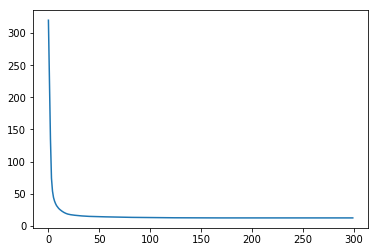

In [38]:
plt.plot(losses)

In [39]:
def plotHyperPlane(X,Y,w1,w2,b):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:,0],X[:,1],c=Y)
    x1=np.linspace(-2,4,10)
    x2=-(w1*x1+b)/w2
    xp= -(w1*x1+b+1)/w2
    xn= -(w1*x1+b-1)/w2
    plt.plot(x1,x2)
    plt.plot(x1,xp,linestyle="--")
    plt.plot(x1,xn,linestyle="--")

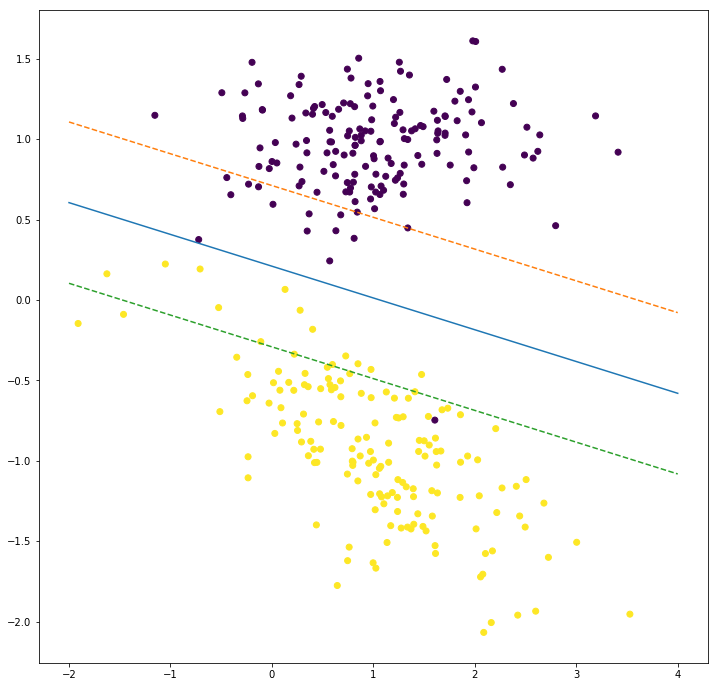

In [40]:
plotHyperPlane(X_train,y_train,w[0][0],w[0][1],b)

In [41]:
ypred=mySVM.predict(w,b,X_test)

In [42]:
mySVM.accuracy(ypred,y_test)

[ 1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1
 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1
  1  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1
  1 -1  1 -1  1 -1 -1  1]
[ 1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1
 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1
  1  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1
  1 -1  1 -1  1 -1 -1  1]
100.0
